# Carregamento das bibliotecas e dados

In [53]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os arquivos CSV
transaction_df = pd.read_csv('/content/transaction_fact_v3_2024.csv')
target_store_df = pd.read_csv('/content/target_store_final_v3.csv')

# Exibir as primeiras linhas para verificar a carga dos dados
print(transaction_df.head())
print(target_store_df.head())


         data  cod_vendedor              cod_loja cod_transacao  quantidade  \
0  2024-05-29           917  SP Capital Centro_48    000484fc7c           1   
1  2024-05-31            58  SP Capital Centro_99    0012fb5659           2   
2  2024-05-31            58  SP Capital Centro_99    0012fb5659           1   
3  2024-05-31           287        SP Interior_32    001af83ace           1   
4  2024-05-30           371  SP Capital Centro_11    0026881cb2           2   

       cod_prod       preco  
0  917845373827   88.602803  
1  705516174930  123.625588  
2  715775125765   66.964719  
3  336847961663   66.964719  
4  426037160751  144.233287  
     month store_id  sales_target
0  01/2000    RS_37         91812
1  01/2001    PR_11         86982
2  01/2001    PR_13         84842
3  01/2001    PR_33         95664
4  01/2001    PR_47         90399


# Variáveis e pontos estratégicos

## Variáveis identificadas

- Vendas totais (preco): Essencial para medir o desempenho de vendas.

- Metas de vendas (sales_target): Representa os objetivos que cada loja precisa atingir.

- Loja (cod_loja): Identifica e permite segmentar as lojas, o que garante comparações de performance.

## Análises feitas

- O código seleciona variáveis-chave, como as vendas totais e metas, para avaliar o desempenho da loja SC_47 em relação às metas estabelecidas e outras lojas da região.

- A análise vai além das vendas e metas individuais, integrando a performance da loja com a compensação do gerente, criando um vínculo entre a governança de vendas e a gestão de pessoas.

# Tratamento de datas

In [54]:
# Converter colunas de datas para formato datetime
transaction_df['data'] = pd.to_datetime(transaction_df['data'])
target_store_df['month'] = pd.to_datetime(target_store_df['month'], format='%m/%Y')

# Verificar se as conversões foram bem-sucedidas
print(transaction_df.info())
print(target_store_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290525 entries, 0 to 290524
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   data           290525 non-null  datetime64[ns]
 1   cod_vendedor   290525 non-null  int64         
 2   cod_loja       290525 non-null  object        
 3   cod_transacao  290525 non-null  object        
 4   quantidade     290525 non-null  int64         
 5   cod_prod       290525 non-null  int64         
 6   preco          290525 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 15.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46903 entries, 0 to 46902
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   month         46903 non-null  datetime64[ns]
 1   store_id      46903 non-null  object        
 2   sales_target  46903 no

- O código organiza os dados por data, convertendo as colunas para o formato datetime para facilitar a análise temporal.

- As datas segmentam as análises por mês, permitindo observar tendências e variações de performance ao longo do tempo.

- A estruturação dos dados por loja vai ao encontro da governança estratégica, pois permite comparações temporais e regionais, facilitando decisões baseadas em dados sobre desempenho e compensação.

# Identificação do último mês disponível

In [55]:
ultimo_ano_mes_transaction = transaction_df['data'].dt.to_period('M').max()
print(f'Último mês disponível nas transações: {ultimo_ano_mes_transaction}')

ultimo_ano_mes_target = target_store_df['month'].dt.to_period('M').max()
print(f'Último mês disponível nas metas: {ultimo_ano_mes_target}')

Último mês disponível nas transações: 2024-06
Último mês disponível nas metas: 2024-12


- É identificado o último mês disponível em ambas as bases, garantindo que estamos analisando o período mais recente.

- A descoberta de dados inclui a seleção do mês mais recente para alinhar a análise de vendas e metas, assegurando que as comparações sejam precisas.

- Essa etapa é crítica para garantir que os dados mais recentes sejam usados para tomar decisões estratégicas, como avaliar a performance atual da loja SC_47 e calcular a compensação do gerente.

# Análise estatística das vendas

In [56]:
# Exemplo de resumo estatístico de uma variável estratégica
vendas_estatisticas = transaction_df['preco'].describe()
print("Estatísticas descritivas das vendas:")
print(vendas_estatisticas)

Estatísticas descritivas das vendas:
count    290525.000000
mean        201.988711
std         269.914317
min          12.202628
25%          65.924030
50%         113.332042
75%         211.725375
max        2312.574711
Name: preco, dtype: float64


- Apresentação de um resumo estatístico básico das vendas, fornecendo uma visão geral do desempenho.

- A análise descritiva possui métricas como média e desvio padrão, importantes para entender a variação nas vendas.

- As estatísticas são usadas para informar decisões estratégicas, como ajustes nas metas de vendas e previsão de receitas.

# Distribuição das vendas

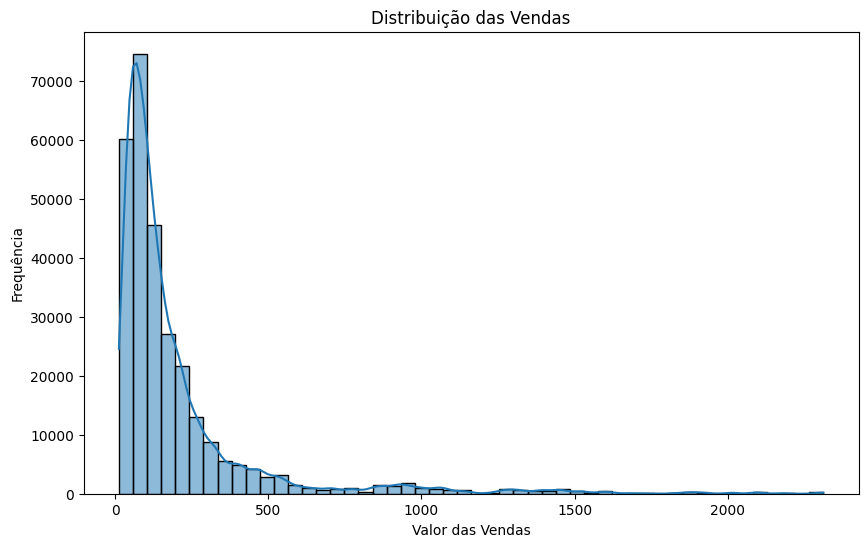

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(transaction_df['preco'], kde=True, bins=50)
plt.title('Distribuição das Vendas')
plt.xlabel('Valor das Vendas')
plt.ylabel('Frequência')
plt.show()


- A linha de densidadepermite uma interpretação mais profunda da distribuição, mostrando as áreas de maior concentração de vendas.

- A interpretação completa é facilitada pelo gráfico que mostra a distribuição das vendas, identificando picos e padrões que podem ser cruciais para ajustes de estratégias de preços e metas.

# Meta de vendas por loja

<ipython-input-58-391f945661f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_store_df, x='store_id', y='sales_target', palette='viridis')


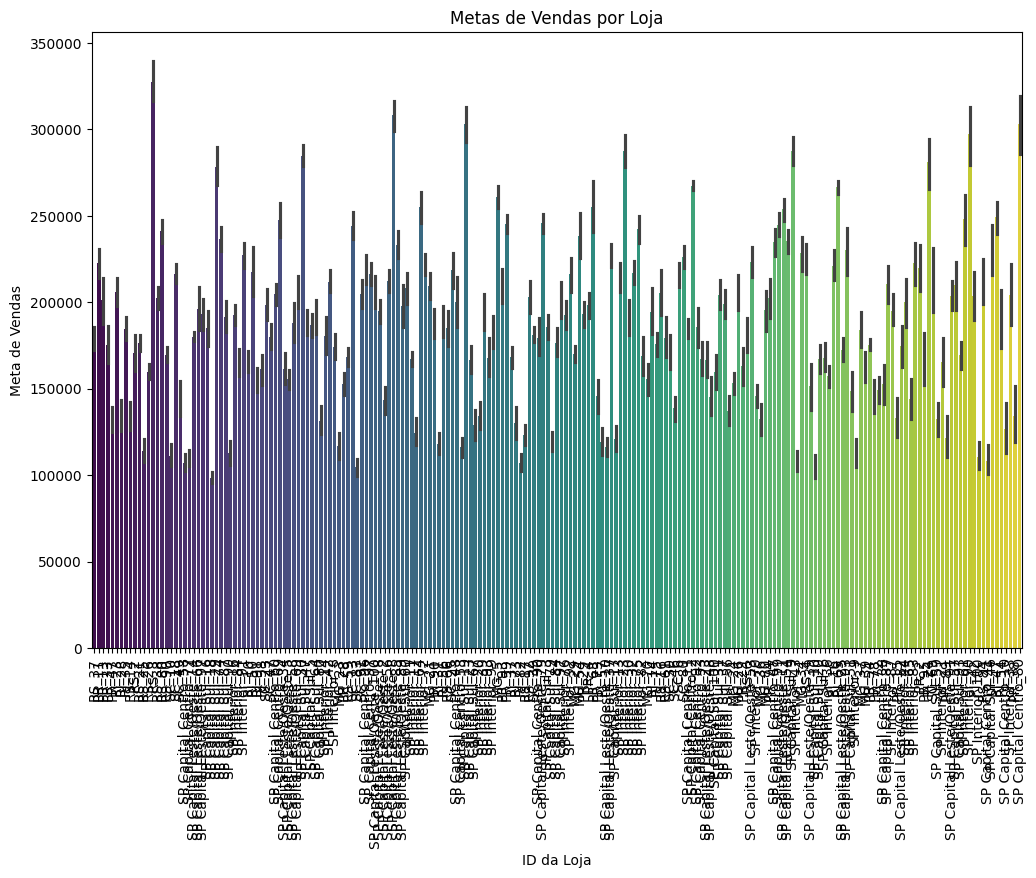

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(data=target_store_df, x='store_id', y='sales_target', palette='viridis')
plt.xticks(rotation=90)
plt.title('Metas de Vendas por Loja')
plt.xlabel('ID da Loja')
plt.ylabel('Meta de Vendas')
plt.show()

# Análise das vendas da SC_47

In [59]:
# Filtrar as transações para SC_47 no último mês disponível
transacoes_sc_47 = transaction_df[(transaction_df['cod_loja'] == 'SC_47') &
                                  (transaction_df['data'].dt.to_period('M') == ultimo_ano_mes_transaction)]

# Somar as vendas totais da SC_47 no último mês
vendas_totais_sc_47 = transacoes_sc_47['preco'].sum()
print(f'Vendas totais de SC_47 em {ultimo_ano_mes_transaction}: R$ {vendas_totais_sc_47}')

Vendas totais de SC_47 em 2024-06: R$ 25986.45182231436


 - A soma das vendas da loja SC_47 fornece um dado inicial sobre o desempenho da loja.
 - A análise detalhada de uma loja específica (SC_47) mostra a relevância de acompanhar o desempenho individual das lojas para a estratégia global. Essa análise pode ser usada para calcular a compensação do gerente e identificar o impacto das vendas em metas globais, integrando assim a governança de vendas com a gestão de pessoas.

# Meta de vendas da SC_47

In [60]:
# Filtrar a meta de vendas de SC_47 para o mesmo mês das transações
target_sc_47 = target_store_df[(target_store_df['store_id'] == 'SC_47') &
                               (target_store_df['month'].dt.to_period('M') == ultimo_ano_mes_transaction)]['sales_target'].sum()

print(f'Meta de vendas de SC_47 em {ultimo_ano_mes_transaction}: R$ {target_sc_47}')

Meta de vendas de SC_47 em 2024-06: R$ 266926


- Comparação das vendas da loja SC_47 com sua meta.

- A comparação das vendas com as metas permite uma avaliação completa do desempenho da loja em relação às expectativas, orientando decisões estratégicas como ajustes de metas ou campanhas de incentivo.

# Comparação de vendas da região de Santa Catarina

In [61]:
# Filtrar as transações de todas as lojas da região SC_ no mesmo mês
vendas_regiao_sc_junho_2024 = transaction_df[(transaction_df['cod_loja'].str.startswith('SC_')) &
                                             (transaction_df['data'].dt.to_period('M') == ultimo_ano_mes_transaction)]

# Somar as vendas por loja na região SC_
vendas_por_loja_sc_junho_2024 = vendas_regiao_sc_junho_2024.groupby('cod_loja')['preco'].sum()

print('Vendas por loja na região SC_ em Junho de 2024:')
print(vendas_por_loja_sc_junho_2024)

Vendas por loja na região SC_ em Junho de 2024:
cod_loja
SC_10    17010.738921
SC_13    19796.067693
SC_18    14627.627583
SC_23    28324.361489
SC_25    31752.051992
SC_30    12600.169388
SC_39    31047.382340
SC_46    32815.943083
SC_47    25986.451822
SC_49    31594.233360
SC_6     29418.886981
SC_69    20861.654705
SC_80    22250.544933
SC_83    25885.088716
SC_91    18005.979544
Name: preco, dtype: float64


#  Comparação visual das vendas por loja na região SC

<ipython-input-62-574c7c5d88a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_loja_sc_junho_2024.index, y=vendas_por_loja_sc_junho_2024.values, palette='coolwarm')


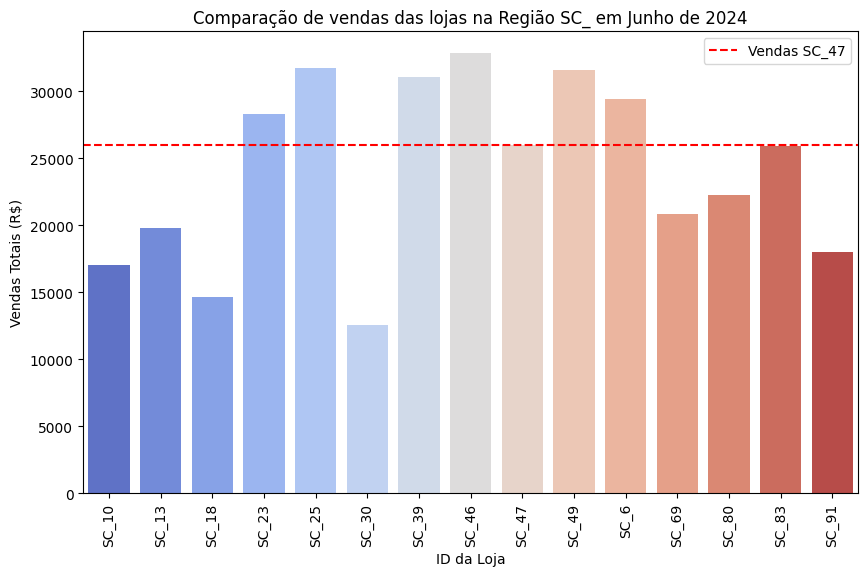

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(x=vendas_por_loja_sc_junho_2024.index, y=vendas_por_loja_sc_junho_2024.values, palette='coolwarm')
plt.title('Comparação de vendas das lojas na Região SC_ em Junho de 2024')
plt.xlabel('ID da Loja')
plt.ylabel('Vendas Totais (R$)')
plt.axhline(y=vendas_totais_sc_47, color='red', linestyle='--', label='Vendas SC_47')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Compensation do gerente da SC_47

In [63]:
compensacao_gerente = 5000

if vendas_totais_sc_47 >= target_sc_47:
    compensacao_gerente += 3000

# Verificar se SC_47 teve a maior venda da região
if vendas_totais_sc_47 > vendas_por_loja_sc_junho_2024.max():
    compensacao_gerente += 2000

print(f'Compensação total do gerente de SC_47: R$ {compensacao_gerente}')


Compensação total do gerente de SC_47: R$ 5000


# Insights sobre desempenho de lojas

In [64]:
maior_venda_loja = vendas_por_loja_sc_junho_2024.idxmax()
menor_venda_loja = vendas_por_loja_sc_junho_2024.idxmin()

print(f"A loja com maior venda é {maior_venda_loja} com R$ {vendas_por_loja_sc_junho_2024.max()}")
print(f"A loja com menor venda é {menor_venda_loja} com R$ {vendas_por_loja_sc_junho_2024.min()}")

A loja com maior venda é SC_46 com R$ 32815.94308286788
A loja com menor venda é SC_30 com R$ 12600.169388459266
